# Week 8 Task
Prepare an analysis of the titanic dataset (data/titanic.csv).
You are interested in determining factors that lead to **death or survival** of passengers.
However, before actually training an ML model to predict death or survival, you should make
yourself familiar with the data.

Look into which features are available, what types of features these are, whether
**values are missing** and how to deal with them, etc.
You can then continue to **create some visualizations** of things you think might be interesting or relevant
in predicting survival, or just generally useful to know about the dataset.
The output should not just be prints of numbers or figures, but also some explanatory text of
what you have been analysing, and which conclusions you can draw from the different steps of your analysis.

You can do all of this in a Jupyter Notebook, embedding analysis, code and explanations in a single document.
Alternatively you can create a separate script for the analysis, and then list results, figures and explanations
either in the PR directly, or in some form of pdf/word/markdown/... document.

For this exercise I very much encourage you to work together to come up with ideas of which
calculations/plots/... might be interesting to analyse. You will find very many such analyses online
for the titanic data, but I would recommend trying to think of your own ideas first, and only later
look for more inspiration online.

## Description of attributes
| Attribute | Description |
| --- | --- |
| PClass | Passenger Class |
| SibSp | Number of siblings or spouses |
| Parch | Number of parents or siblings |
| Fare | Prices payed |
| Embarked | Embarked ship from Southampton, Cherbourg, or Queenstown |

## Ideas: What data can be analysed?
- What values of the dataset are missing and can they be replaced?
- for all attributes, difference between mean of survivors and dead 
- relation of all attributes and rate of survival
- Does the number of family members impact the probability of survival? (independent of other attributes)
- length of name and survival rate 🤔

## How will the data be visualized?

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
titanic_data = pd.read_csv("../../data/titanic.csv")
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [69]:
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Filling NaN values

In [284]:
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].mean())
print(f"Age Column has {titanic_data['Age'].isna().sum()} NaN values")

Age Column has 0 NaN values


## Basic evaluation of dataset

In [277]:
rate_survived = titanic_data["Survived"].mean()
num_survivors = int(len(titanic_data.index) * rate_survived)
num_male = len(titanic_data[titanic_data.Sex == "male"].index)
num_female = len(titanic_data[titanic_data.Sex == "female"].index)
pclasses = [len(titanic_data[titanic_data.Pclass == c]) for c in [1, 2, 3]]
embarked = titanic_data.groupby("Embarked").count()
print(f"The total passenger count was {len(titanic_data.index)}")
print(f"Of all passengers {num_survivors} ({round(rate_survived * 100, 1)}%) survived.")
print(f"{num_male} male and {num_female} female passengers")
for c in [1, 2, 3]: print(f"There where {pclasses[c-1]} class {c} passengers")
for i in embarked.index: print(f"{embarked.loc[i,'PassengerId']} passengers embarked from {i}")

The total passenger count was 891
Of all passengers 342 (38.4%) survived.
577 male and 314 female passengers
There where 216 class 1 passengers
There where 184 class 2 passengers
There where 491 class 3 passengers
168 passengers embarked from C
77 passengers embarked from Q
644 passengers embarked from S


## What attributes could be impacting the survival rate?
For some values, let's analyse the difference between the mean of survivors and dead.

In [163]:
number_data = titanic_data.copy()
number_data = number_data.drop(["PassengerId", "Name", "Ticket", "Cabin", "Embarked"], axis=1)
number_data["Sex"] = number_data["Sex"].apply(lambda v: 1 if v=="male" else 0)
mean_data = number_data.groupby("Survived").mean()
mean_data

,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,
0,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408


In [214]:
mean_diff = mean_data.iloc[0] - mean_data.iloc[1]
mean_diff.abs()

Pclass     0.581584
Sex        0.533746
Age        2.282490
SibSp      0.080050
Parch      0.135222
Fare      26.277521
dtype: float64

## What can we conclude from this?
Survivors were on average... \
   ... 0.58 passenger classes higher \
   ... 53% more likely to be male \
   ... 2.28 Years younger \
   ... paying 26.2$ more

I would now like to investigate those results further.

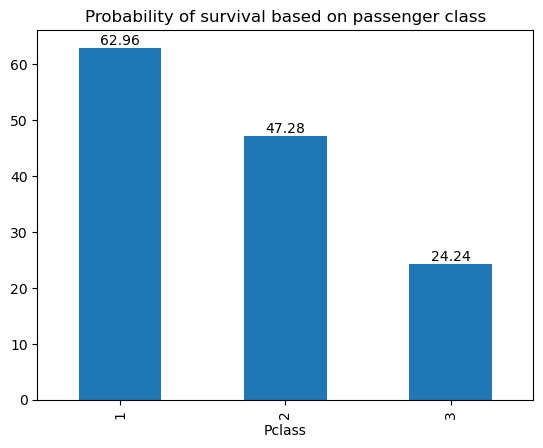

In [248]:
temp_data = titanic_data.groupby("Pclass").mean("Survived")["Survived"]
temp_plot = temp_data.mul(100).round(2).plot(kind="bar", title="Probability of survival based on passenger class")
temp_plot.bar_label(temp_plot.containers[0])
pass

This diagram clearly indicates that the probability of survival was far higher for higher class passengers.

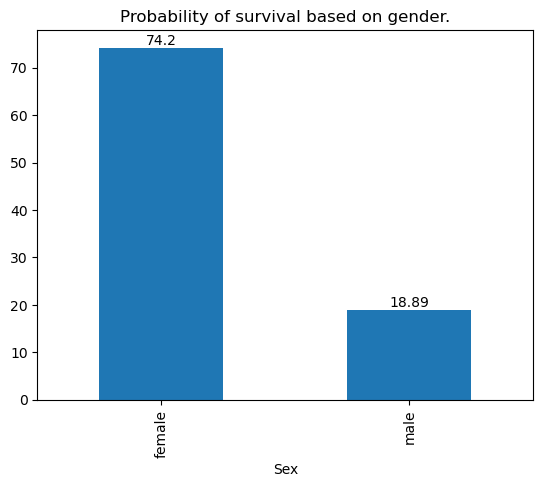

In [249]:
temp_ser: pd.Series = titanic_data.groupby("Sex").mean("Survived")["Survived"]
temp_plot = temp_ser.mul(100).round(2).plot(kind="bar", title="Probability of survival based on gender.")
temp_plot.bar_label(temp_plot.containers[0])
pass

Female passengers had a 74% chance of survival and men passengers only 18%.

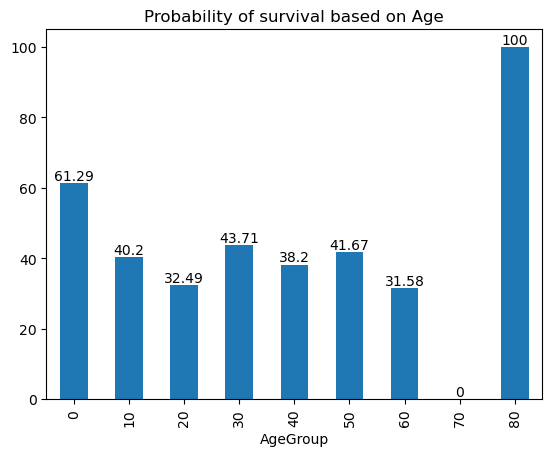

In [328]:
age_group_size = 10
titanic_data["AgeGroup"] = titanic_data["Age"].apply(lambda x: int(x/age_group_size)*age_group_size)
temp_data = titanic_data.groupby("AgeGroup").mean("Survived")["Survived"]
temp_plot = temp_data.mul(100).round(2).plot(kind="bar", title="Probability of survival based on Age")
temp_plot.bar_label(temp_plot.containers[0])
pass

This diagram show that the survival rate of very young passengers was much higher than that of older passengers.

But why does age group 80 have 100% survival rate?

In [294]:
titanic_data[titanic_data.AgeGroup == 80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S,80


Ok, so there was only one person in this age group and he survived.

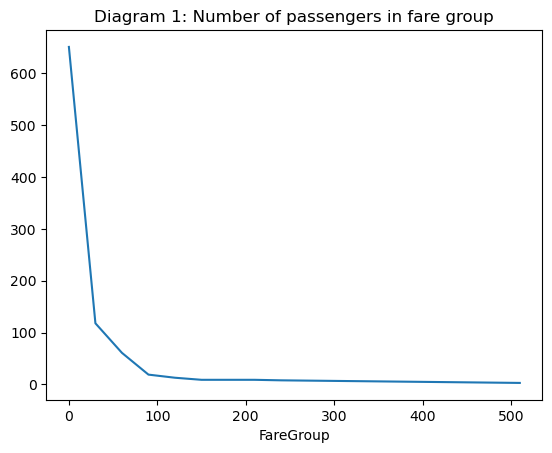

In [359]:
fare_group_size = 30
titanic_data["FareGroup"] = titanic_data["Fare"].apply(lambda x: int(x/fare_group_size)*fare_group_size)
survival_data = titanic_data.groupby("FareGroup").mean("Survived")["Survived"]
total_data = titanic_data.groupby("FareGroup")["PassengerId"].count()
total_data.plot(title="Diagram 1: Number of passengers in fare group")
pass

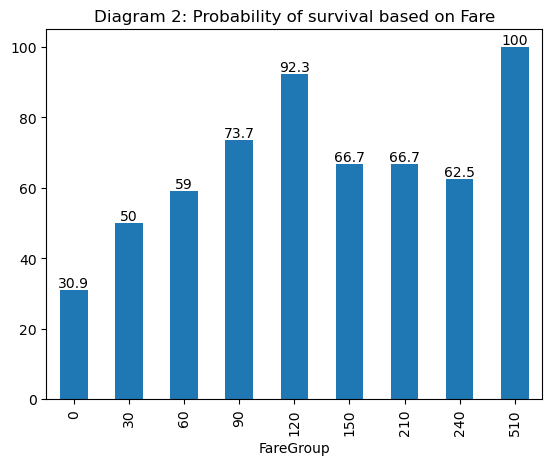

In [358]:
temp_plot = survival_data.mul(100).round(1).plot(kind="bar", title="Diagram 2: Probability of survival based on Fare")
temp_plot.bar_label(temp_plot.containers[0])
pass

Diagram 2 suggests that passengers with a higher fare were a lot more likely to survive. Although this seems very reasonable we have to be careful, as the amount of people with high fare was also much lower (as seen in Diagram 1).

## Further Analysis (for fun)

Does number of people you that passengers traveled with impact chance of survival?

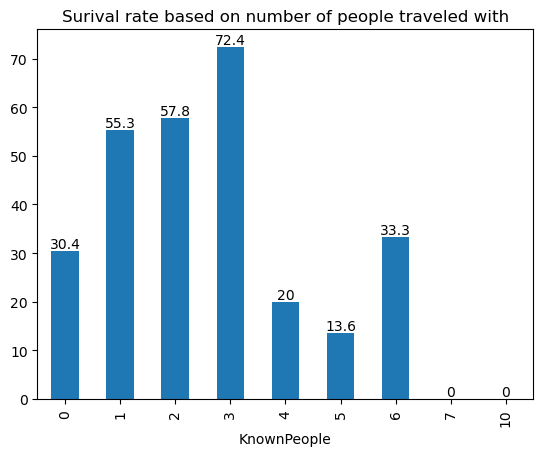

In [402]:
titanic_data["KnownPeople"] = titanic_data["SibSp"] + titanic_data["Parch"]
temp = titanic_data.groupby("KnownPeople").mean("Survived").mul(100).round(1)["Survived"].plot(kind="bar", title="Surival rate based on number of people traveled with")
temp.bar_label(temp.containers[0])
pass

<Axes: title={'center': 'Survival rate based on full name length'}, xlabel='NameLength'>

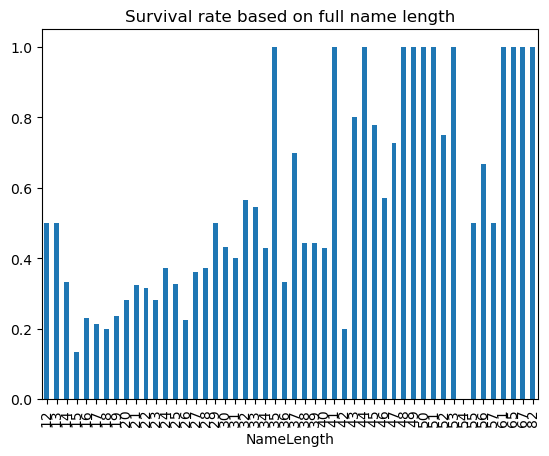

In [400]:
titanic_data["NameLength"] = titanic_data["Name"].apply(lambda n: len(n))
titanic_data.groupby("NameLength").mean("Survived")["Survived"].plot(kind="bar", title="Survival rate based on full name length")

<Axes: xlabel='Age', ylabel='Fare'>

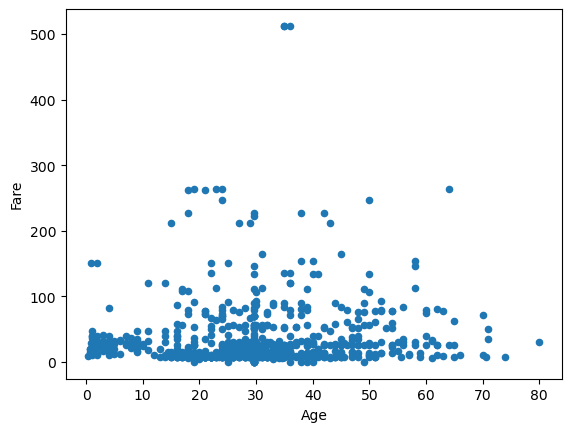

In [398]:
# For the sake of using scatter plots
titanic_data.plot(x="Age", y="Fare", kind="scatter")